## 1. Load the Libraries and Hotel review Data Set

In [ ]:
!pip install afinn
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=1fb05ac432d5f7f139d8b63e01249532ace90f5af8c5ac9bf8e8963e9e829cdf
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

# For data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
sns.set_style("darkgrid")
plt.rcParams.update({"font.size":15})
import plotly.express as px
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


# For text pre processing
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy

from afinn import Afinn
from textblob import TextBlob
nltk.download('vader_lexicon')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,ENGLISH_STOP_WORDS

#Model Accuracy
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving hotel_reviews.xlsx to hotel_reviews.xlsx


In [ ]:
data=pd.read_excel("hotel_reviews.xlsx")

In [ ]:
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [ ]:
#checking for missing values
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [ ]:
# checking for value counts of each review
data["Rating"].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

## 2. Exploring the data-Visualization

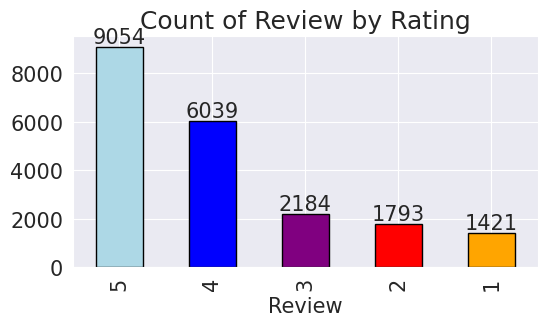

In [ ]:
# Plotting the ratings
color = ['lightblue', 'blue', 'purple', 'red', 'orange']
ax=data["Rating"].value_counts().plot(kind="bar",
                                   title="Count of Review by Rating",
                                   figsize=(6,3),
                                   edgecolor="black",
                                   color=color)
for i in ax.containers:
  ax.bar_label(i)
ax.set_xlabel("Review")
plt.show()

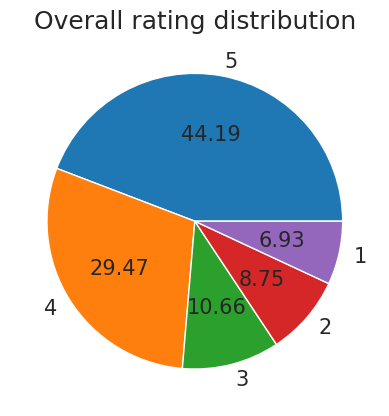

In [ ]:
# Plotting distribution of Ratings
plt.pie(data["Rating"].value_counts(),autopct='%0.2f',labels=["5","4","3","2","1"])
plt.title("Overall rating distribution")
plt.show()

In [ ]:
# Plotting most commonly used words in Reviews.
def plot_word_cloud(data,title):
  wc=WordCloud(width=800,height=600,collocations=False,max_words=300,background_color="black",random_state=1).generate(" ".join(data.values))
  plt.figure(figsize=(8,5))
  plt.imshow(wc)
  plt.tight_layout(pad = 0)
  plt.title(title,fontsize=45)
  plt.axis("off")
  plt.show()


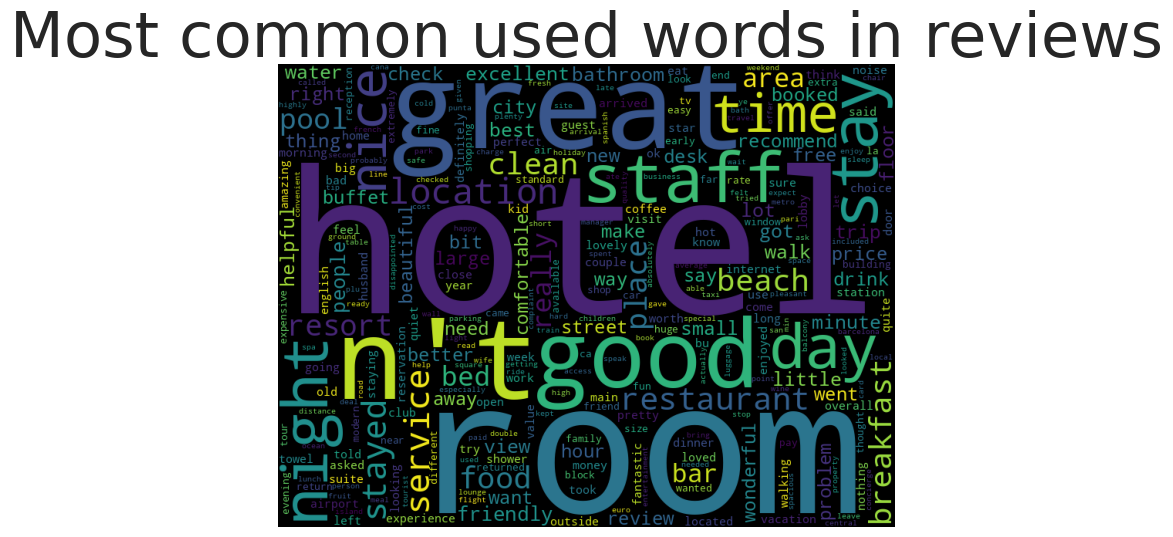

In [ ]:
plot_word_cloud(data=data["Review"],title="Most common used words in reviews")

## 3. Data Cleaning

In [ ]:
stop_word=nltk.corpus.stopwords.words("english")
stopword=ENGLISH_STOP_WORDS
lemmatizer=WordNetLemmatizer()

In [ ]:
#creating a Function for data cleaning
def clean_text(text):
  text=re.sub(r'\w*\d\w*','',str(text)).strip()    # removing numbers attached to the words
  text = re.sub("[\d]+", "", str(text))            # removing strings containg unwanted digits
  text = text.translate(str.maketrans('','',string.punctuation))   # removing punchuations
  text = re.sub('[%s]' % re.escape(string.punctuation), '', str(text))  # removing puncuations
  text = re.sub(r'[^\w\s]', " ", str(text))         # removing white spaces
  text = ' '.join( [w for w in text.split() if len(w)>1] )   #removing single characters
  text=text.split()
  text=" ".join([word for word in text if word not in stopword])   # removing stopwords
  text=nltk.word_tokenize(text)  # Tokenizing
  text=" ".join([lemmatizer.lemmatize(w,"v") for w in text])    # applying lemmatization
  text=" ".join(dict.fromkeys(text.split()))  # remove duplicate words
  return text

In [ ]:
cleaned_review=[]  # list of cleaned reviews
for i in data["Review"]:
  cleaned_review.append(clean_text(i))

In [ ]:
cleaned_review[:2]

['nice hotel expensive park get good deal stay anniversary arrive late even take advice previous review do valet check quick easy little disappoint nonexistent view room clean size bed comfortable wake stiff neck high pillow soundproof like hear music night morning loud bang doors open close people talk hallway maybe just noisy neighbor aveda bath products goldfish touch advantage longer location great walk distance shop overall experience have pay',
 'ok special charge diamond member hilton decide chain shoot anniversary seattle start book suite pay extra website description bedroom bathroom standard hotel room take print reservation desk show say things like tv couch ect clerk tell oh mix suit kimpton sorry free breakfast get kid embassy sit unlike call day stay offer correct false advertise send prefer guest email ask failure provide furnish hard copy printout manager duty do reply solution trip survey follow mail guess concern guestthe staff range indifferent helpful good spot neig

In [ ]:
data["Cleaned_Review"]=cleaned_review
data.head()

,Review,Rating,Cleaned_Review
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive park get good deal stay a...
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay go seahawk game awesome downfall vi...


## 4.Sentiment Analysis

In [ ]:
def sentiments(x):
  if x<=2:
    return "Negative"
  else:
    return "Positive"
Sentiment_fun=lambda x:sentiments(x)

In [ ]:
data["Sentiments"]=data["Rating"].apply(lambda x:sentiments(x))

In [ ]:
data.head()

,Review,Rating,Cleaned_Review,Sentiments
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive park get good deal stay a...,Positive
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,Positive
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,Positive
4,"great stay great stay, went seahawk game aweso...",5,great stay go seahawk game awesome downfall vi...,Positive


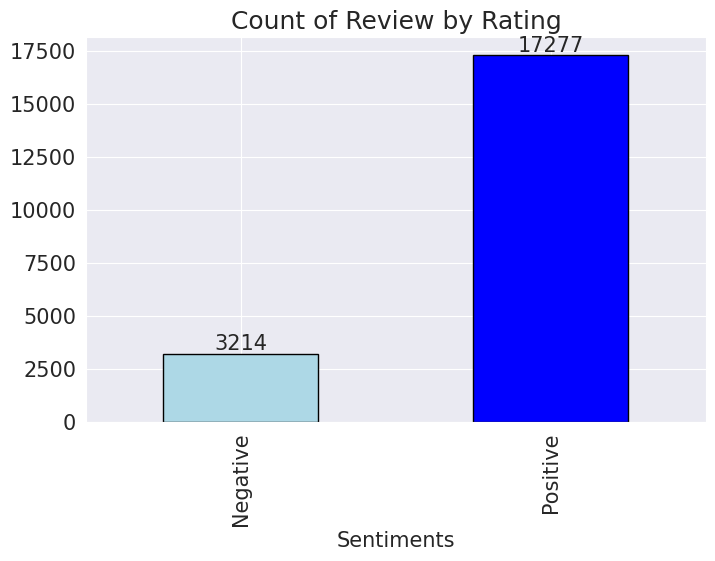

In [ ]:
# lets take a look at the distribution of the reviews in terms of ratings after categorising the data into positive and negative sentiments
color = ['lightblue', 'blue', 'purple', 'red', 'orange']
ax=data["Sentiments"].value_counts().sort_index().plot(kind="bar",
                                               title="Count of Review by Rating",
                                               figsize=(8,5),
                                               edgecolor="black",
                                             color=color)
for i in ax.containers:
  ax.bar_label(i)
ax.set_xlabel("Sentiments")
plt.show()

   from the above graph we could understand that the maximum no of customers have rated 3 4 and 5 and very less custoemst have rated 1 and 2 for the hotel.

**Let us Analyse our data wrt Sentiments**

 Rule Based Sentiment Analysis

* VADER (Valence Aware Dictionary for Sentiment Reasoning)

* TextBlob

* Lexicons with polarity scores - Affin

  **VADER**

It uses a list of lexical features (e.g. word) which are labeled as positive or negative according to their semantic orientation to calculate the text sentiment.   

Vader sentiment returns the probability of a given input sentence to be

Positive, negative, and neutral.



In [ ]:
##Object Instantiation
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
def fetch_sentiment_using_SIA(text):
    sia = SentimentIntensityAnalyzer()
    polarity_scores = sia.polarity_scores(text)
    return 'Negative' if polarity_scores['neg'] > polarity_scores['pos'] else 'Positive'

In [ ]:
#Applying the VADER function to entire data
data['SIA_Vader'] = data.Cleaned_Review.apply(lambda x: fetch_sentiment_using_SIA(x))

In [ ]:
data.head()

,Review,Rating,Cleaned_Review,Sentiments,SIA_Vader
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive park get good deal stay a...,Positive,Positive
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...,Negative,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,Positive,Positive
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,Positive,Positive
4,"great stay great stay, went seahawk game aweso...",5,great stay go seahawk game awesome downfall vi...,Positive,Positive


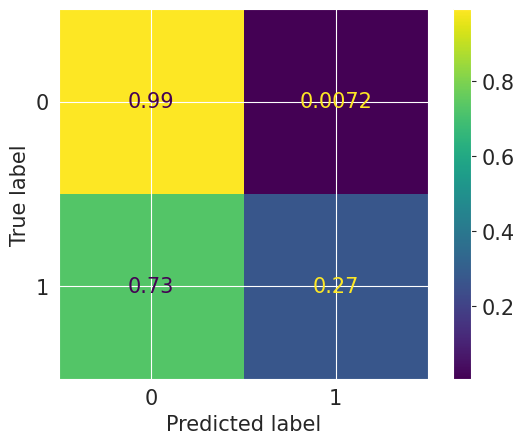

In [ ]:
cm=confusion_matrix(data["Sentiments"],data["SIA_Vader"],normalize="true",labels=["Positive","Negative"])
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()

In [ ]:
Accuracy_Score_Vader=accuracy_score(data["Sentiments"],data["SIA_Vader"])
Accuracy_Score_Vader

0.8798496901078522

Total Count of Sentiments

Positive    95.119809
Negative     4.880191
Name: SIA_Vader, dtype: float64 



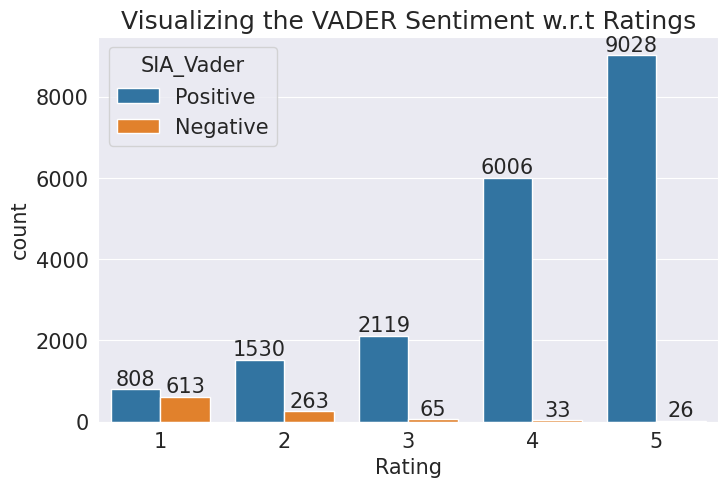

In [ ]:
#Visualizing the Vader Sentiment Analysis
plt.figure(figsize=(8,5))
plt.title("Visualizing the VADER Sentiment w.r.t Ratings")
ax = sns.countplot(data = data , x = 'Rating', hue = 'SIA_Vader')
for i in ax.containers:
    ax.bar_label(i,)

print('Total Count of Sentiments\n')

print(data['SIA_Vader'].value_counts(['SIA_Vader'])*100, '\n')

  **TextBlob**

    -TextBlob is built on top of NLTK and also it is very easy to use and can process the text in a few lines of code. Textblob can be used for complex analysis and working with textual data. When a sentence is passed into Textblob it gives two outputs, which are polarity and subjectivity.
    
    -Polarity is the output that lies between [-1,1], where -1 refers to negative sentiment and +1 refers to positive sentiment. Subjectivity is the output that lies within [0,1] and refers to personal opinions and judgments.


In [ ]:
#Applying the TextBlob to entire data
data['TxtB_Polarity'] = data['Cleaned_Review'].apply(lambda x: TextBlob(x).sentiment[0])

In [ ]:
data.head()

,Review,Rating,Cleaned_Review,Sentiments,SIA_Vader,TxtB_Polarity
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive park get good deal stay a...,Positive,Positive,0.157805
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...,Negative,Positive,0.183042
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,Positive,Positive,0.300569
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,Positive,Positive,0.468056
4,"great stay great stay, went seahawk game aweso...",5,great stay go seahawk game awesome downfall vi...,Positive,Positive,0.445000


In [ ]:
data["Polarity_sentiment"] = ['Positive' if polarity > 0 else 'Negative' for polarity in data['TxtB_Polarity']]

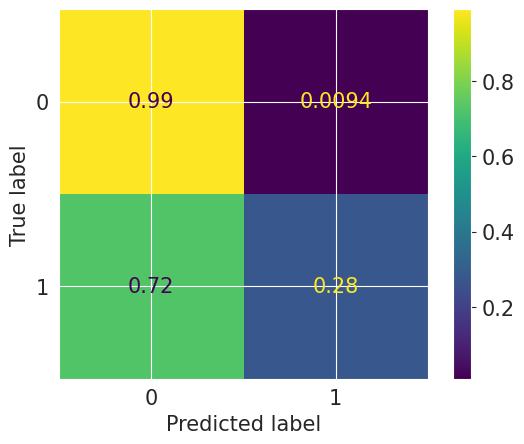

In [ ]:
cm=confusion_matrix(data["Sentiments"],data["Polarity_sentiment"],normalize="true",labels=["Positive","Negative"])
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()

In [ ]:
Accuracy_Score_TxtB=accuracy_score(data["Sentiments"],data["Polarity_sentiment"])
Accuracy_Score_TxtB

0.8786784441950124

Total Count of Sentiments

Positive    94.866039
Negative     5.133961
Name: Polarity_sentiment, dtype: float64 



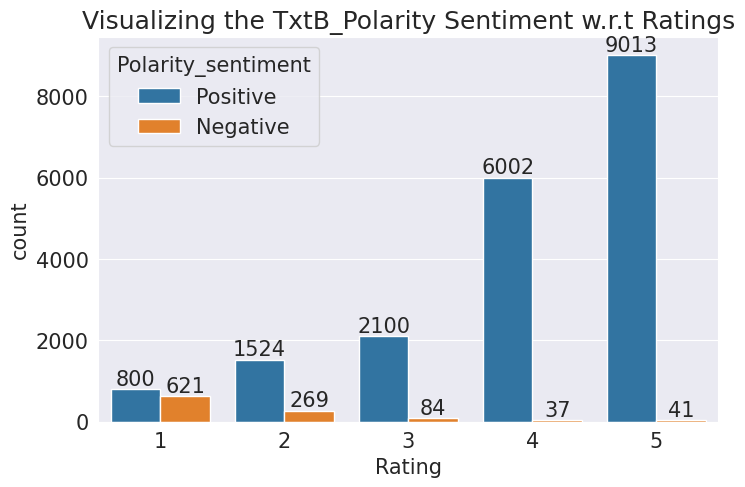

In [ ]:
#Visualizing the TxtB_Polarity Sentiment Analysis
plt.figure(figsize=(8,5))

plt.title("Visualizing the TxtB_Polarity Sentiment w.r.t Ratings")

ax = sns.countplot(data = data , x = 'Rating', hue = 'Polarity_sentiment')

for i in ax.containers:
    ax.bar_label(i,)

print('Total Count of Sentiments\n')

print(data['Polarity_sentiment'].value_counts(['Polarity_sentiment'])*100, '\n')

Afinn Sentiment Analysis

* Afinn is the simplest yet popular lexicons used for sentiment analysis developed by Finn Årup Nielsen. It contains 3300+ words with a polarity score associated with each word.

* Afinn is a list of words rated for valence with an integer between minus five (negative) and plus five (positive). The comparative score is simply: sum of each token / number of tokens.

In [ ]:
#Object Instantiation
afn = Afinn()

In [ ]:
#Applying afinn to dataset
data['Afinn_score'] = data['Cleaned_Review'].apply(lambda x: afn.score(x))

In [ ]:
data.head()

,Review,Rating,Cleaned_Review,Sentiments,SIA_Vader,TxtB_Polarity,Polarity_sentiment,Afinn_score
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive park get good deal stay a...,Positive,Positive,0.157805,Positive,14.0
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...,Negative,Positive,0.183042,Positive,27.0
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,Positive,Positive,0.300569,Positive,12.0
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,Positive,Positive,0.468056,Positive,22.0
4,"great stay great stay, went seahawk game aweso...",5,great stay go seahawk game awesome downfall vi...,Positive,Positive,0.445000,Positive,18.0


In [ ]:
#Defining a function for Sentiment Analysis
def condition(x):
    if x>=20:
        return "Positive"
    else:
        return 'Negative'

In [ ]:
#Applying condition on Afinn score
data['Affin_Sent'] = data['Afinn_score'].apply(condition)

In [ ]:
#Reviewing the data
data[['Cleaned_Review',  'Rating', 'Afinn_score', 'Affin_Sent']]

,Cleaned_Review,Rating,Afinn_score,Affin_Sent
0,nice hotel expensive park get good deal stay a...,4,14.0,Negative
1,ok special charge diamond member hilton decide...,2,27.0,Positive
2,nice room experience hotel monaco seattle good...,3,12.0,Negative
3,unique great stay wonderful time hotel monaco ...,5,22.0,Positive
4,great stay go seahawk game awesome downfall vi...,5,18.0,Negative
...,...,...,...,...
20486,best keep secret time stay charm star ca nt be...,5,24.0,Positive
20487,great location price view hotel quick place si...,4,10.0,Negative
20488,ok just look nice modern outside desk staff nt...,2,8.0,Negative
20489,hotel theft ruin vacation open sept guests wee...,1,13.0,Negative


In [ ]:
data['Affin_Sent'].value_counts()

Negative    14392
Positive     6099
Name: Affin_Sent, dtype: int64

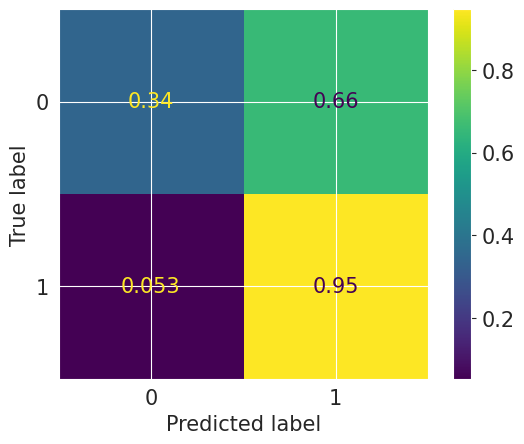

In [ ]:
cm=confusion_matrix(data["Sentiments"],data["Affin_Sent"],normalize="true",labels=["Positive","Negative"])
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()

In [ ]:
Accuracy_Score_Affin=accuracy_score(data["Sentiments"],data["Affin_Sent"])
Accuracy_Score_Affin

0.437899565662974

Total Count of Sentiments

Negative    70.235713
Positive    29.764287
Name: Affin_Sent, dtype: float64 



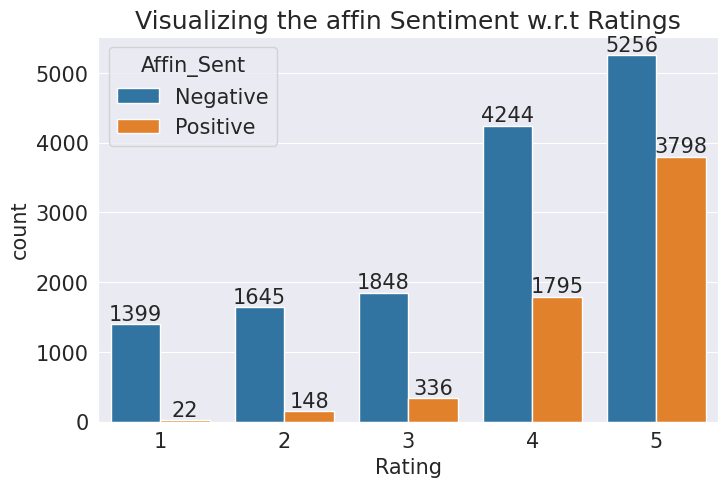

In [ ]:
#Visualizing the Affin Sentiment Analysis
plt.figure(figsize=(8,5))

plt.title("Visualizing the affin Sentiment w.r.t Ratings")

ax = sns.countplot(data = data , x = 'Rating', hue = 'Affin_Sent')

for i in ax.containers:
    ax.bar_label(i,)

print('Total Count of Sentiments\n')

print(data['Affin_Sent'].value_counts(['Affin_Sent'])*100, '\n')

In [ ]:
print('Accuracy with Vader Sentiment Analysis      = ',Accuracy_Score_Vader*100,'%')
print('Accuracy with Txt Blob                      = ',Accuracy_Score_TxtB*100,'%')
print('Accuracy with Affin Sentiment Analysis      =',Accuracy_Score_Affin*100,'%')

Accuracy with Vader Sentiment Analysis      =  87.98496901078522 %
Accuracy with Txt Blob                      =  87.86784441950124 %
Accuracy with Affin Sentiment Analysis      = 43.7899565662974 %


From the above comparison we could understand that the performance of VADER Sentiment Analysis is best.

In [ ]:
#Converting the ratings into two labels of Positive & Negative
data['Target'] = data['Rating'].apply(lambda x: 1 if x > 3 else 0)

## 5. N-Gram

In [ ]:
# Bi Gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]


In [ ]:
top2_words = get_top_n2_words(data["Cleaned_Review"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(50)

,Bi-gram,Freq
0,do nt,1981
1,staff friendly,1874
2,great location,1348
3,friendly helpful,1213
4,walk distance,1160
5,just return,1132
6,punta cana,1104
7,highly recommend,1100
8,stay nights,1056
9,room clean,1024


<ipython-input-86-8ad2e7024b98>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])


[Text(0, 0, 'do nt'),
 Text(1, 0, 'staff friendly'),
 Text(2, 0, 'great location'),
 Text(3, 0, 'friendly helpful'),
 Text(4, 0, 'walk distance'),
 Text(5, 0, 'just return'),
 Text(6, 0, 'punta cana'),
 Text(7, 0, 'highly recommend'),
 Text(8, 0, 'stay nights'),
 Text(9, 0, 'room clean'),
 Text(10, 0, 'stay hotel'),
 Text(11, 0, 'staff helpful'),
 Text(12, 0, 'great hotel'),
 Text(13, 0, 'ca nt'),
 Text(14, 0, 'read review'),
 Text(15, 0, 'minute walk'),
 Text(16, 0, 'hotel stay'),
 Text(17, 0, 'air condition'),
 Text(18, 0, 'place stay'),
 Text(19, 0, 'make sure')]

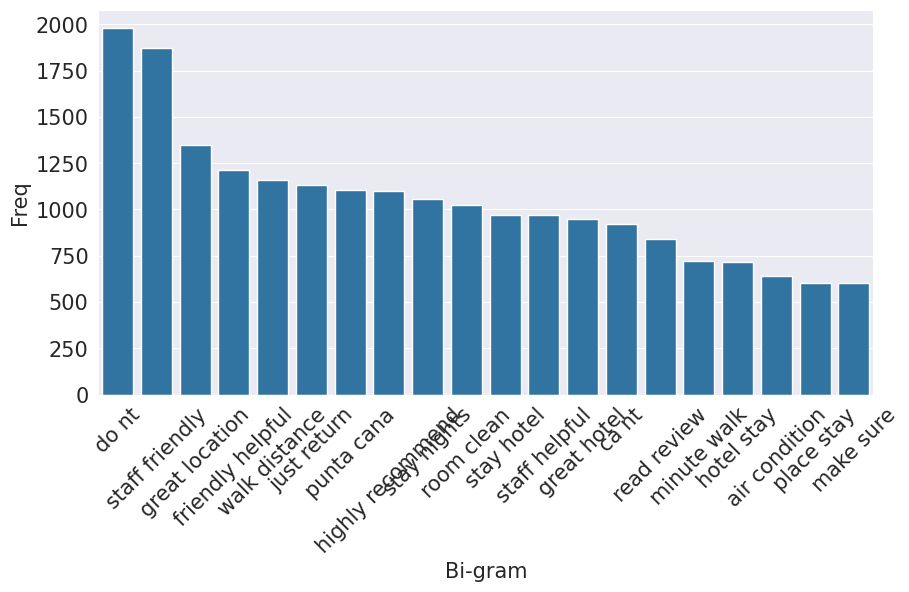

In [ ]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [ ]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [ ]:
top3_words = get_top_n3_words(data["Cleaned_Review"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [ ]:
top3_df

,Tri-gram,Freq
0,staff friendly helpful,639
1,flat screen tv,222
2,king size bed,202
3,just return night,186
4,hotel great location,184
...,...,...
195,upgrade junior suite,32
196,return week stay,32
197,stay punta cana,32
198,stay nights room,31


<ipython-input-90-785b9243dc80>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])


[Text(0, 0, 'staff friendly helpful'),
 Text(1, 0, 'flat screen tv'),
 Text(2, 0, 'king size bed'),
 Text(3, 0, 'just return night'),
 Text(4, 0, 'hotel great location'),
 Text(5, 0, 'old san juan'),
 Text(6, 0, 'great place stay'),
 Text(7, 0, 'free internet access'),
 Text(8, 0, 'easy walk distance'),
 Text(9, 0, 'return night stay'),
 Text(10, 0, 'staff helpful friendly'),
 Text(11, 0, 'ca nt wait'),
 Text(12, 0, 'just return week'),
 Text(13, 0, 'stay hotel nights'),
 Text(14, 0, 'ca nt beat'),
 Text(15, 0, 'la carte restaurants'),
 Text(16, 0, 'staff extremely helpful'),
 Text(17, 0, 'hotel stay nights'),
 Text(18, 0, 'great hotel stay'),
 Text(19, 0, 'good value money')]

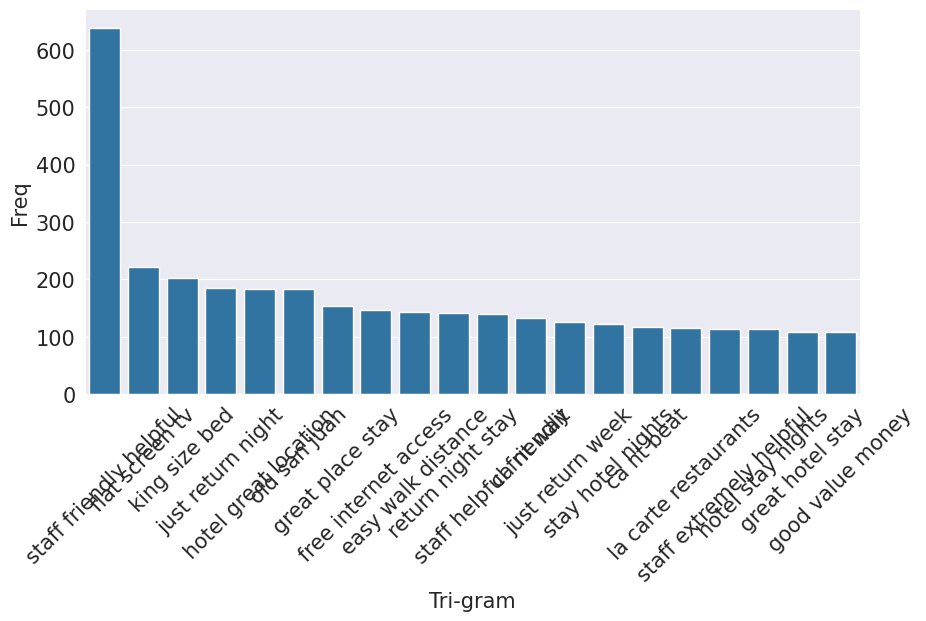

In [ ]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

## 6.Bag of Words(Feature Extraction)
     1. BoW
     2. TFIDF

In [ ]:
data.head()

,Review,Rating,Cleaned_Review,Sentiments,SIA_Vader,TxtB_Polarity,Polarity_sentiment,Afinn_score,Affin_Sent,Target
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive park get good deal stay a...,Positive,Positive,0.157805,Positive,14.0,Negative,1
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...,Negative,Positive,0.183042,Positive,27.0,Positive,0
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,Positive,Positive,0.300569,Positive,12.0,Negative,0
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,Positive,Positive,0.468056,Positive,22.0,Positive,1
4,"great stay great stay, went seahawk game aweso...",5,great stay go seahawk game awesome downfall vi...,Positive,Positive,0.445000,Positive,18.0,Negative,1


# 6.1 BOW : Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CV=CountVectorizer()
CV_Features=CV.fit_transform(data["Cleaned_Review"])

In [ ]:
CV_Features[0]   # the data is converted into sparse matric

<1x68890 sparse matrix of type '<class 'numpy.int64'>'
	with 69 stored elements in Compressed Sparse Row format>

In [ ]:
CV.get_feature_names_out()[:50]

array(['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaaaaa', 'aaaaaaaaaaaaaaa',
       'aaaare', 'aaah', 'aaahhh', 'aadvantage', 'aah', 'aahh',
       'aahhquiet', 'aalders', 'aand', 'aany', 'aaron', 'aarp', 'aarrgh',
       'aas', 'aavacationscom', 'ab', 'abac', 'aback', 'abaited',
       'abalone', 'abandon', 'abba', 'abbaye', 'abbelouie', 'abberation',
       'abbey', 'abbot', 'abbott', 'abbreviate', 'abby', 'abc', 'abd',
       'abderahim', 'abdication', 'abdomen', 'abdominal', 'abe',
       'abeautiful', 'abel', 'aber', 'abercrombie', 'aberdeen',
       'abessess', 'abetter'], dtype=object)

In [ ]:
X=CV_Features  # X is the transformed matrix which we got after count vectorizer
y=data["Target"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# i.Multinomial Naive Bayes (MNB)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

MB=MultinomialNB()
MB.fit(X_train,y_train)
predMB=MB.predict(X_test)


score_MB = np.mean(predMB==y_test)

print("Confusion Matrix for Random Forest Classifier :")
print(confusion_matrix(y_test,predMB))

print("Score: ",score_MB)


print("Classification Report: ")
print(classification_report(y_test,predMB))

Confusion Matrix for Random Forest Classifier :
[[ 961  670]
 [ 168 4349]]
Score:  0.8636955107351985
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.59      0.70      1631
           1       0.87      0.96      0.91      4517

    accuracy                           0.86      6148
   macro avg       0.86      0.78      0.80      6148
weighted avg       0.86      0.86      0.85      6148



**Understranding the Classification report**
A confusion matrix is a table that shows the number of True Postive,False Positive,True Negative and False Negative for each class

The score listed in the output (86.36 %) is overall accuracy of the model which is the percentage of the correct predictions across all classes.

Precision measures the proportion of correct predictions among the positive predictions for a particular class.
Recall measures the proportion of correct predictions among the actual positive instances for a particular class.
F1-score is the harmonic mean of precision and recall, which provides a balanced measure of the model's performance.

In the output provided, the classification report shows the precision, recall, and F1-score for each class (0 and 1) as well as the overall accuracy of the model. The macro avg and weighted avg provide a weighted average of precision, recall, and F1-score for all classes.

# ii.Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
test_preddt=dt.predict(X_test)


score_dt = np.mean(test_preddt==y_test)

print("Confusion Matrix fro Decison Tree:")
print(confusion_matrix(y_test,test_preddt))

print("Score: ",score_dt)


print("Classification Report: ")
print(classification_report(y_test,test_preddt))

Confusion Matrix fro Decison Tree:
[[ 939  692]
 [ 615 3902]]
Score:  0.7874105400130124
Classification Report: 
              precision    recall  f1-score   support

           0       0.60      0.58      0.59      1631
           1       0.85      0.86      0.86      4517

    accuracy                           0.79      6148
   macro avg       0.73      0.72      0.72      6148
weighted avg       0.78      0.79      0.79      6148



The score listed in the output (78.74 %) is overall accuracy of the model which is the percentage of the correct predictions across all classes.

# iii. Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
predRFC=RFC.predict(X_test)


score_RFC = np.mean(predRFC==y_test)

print("Confusion Matrix for Random Forest Classifier :")
print(confusion_matrix(y_test,predRFC))

print("Score: ",score_RFC)


print("Classification Report: ")
print(classification_report(y_test,predRFC))

Confusion Matrix for Random Forest Classifier :
[[ 548 1083]
 [  28 4489]]
Score:  0.8192908262849707
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.34      0.50      1631
           1       0.81      0.99      0.89      4517

    accuracy                           0.82      6148
   macro avg       0.88      0.66      0.69      6148
weighted avg       0.84      0.82      0.79      6148



The score listed in the output (81.92 %) is overall accuracy of the model which is the percentage of the correct predictions across all classes.

# iv. Support Vector Machines(SVM)

In [ ]:
from sklearn.svm import SVC

SVC=SVC()
SVC.fit(X_train,y_train)
predSVC=SVC.predict(X_test)


score_SVC = np.mean(predSVC==y_test)

print("Confusion Matrix for SVM :")
print(confusion_matrix(y_test,predSVC))

print("Score: ",score_SVC)


print("Classification Report: ")
print(classification_report(y_test,predSVC))

Confusion Matrix for SVM :
[[1112  519]
 [ 155 4362]]
Score:  0.8903708523096943
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      1631
           1       0.89      0.97      0.93      4517

    accuracy                           0.89      6148
   macro avg       0.89      0.82      0.85      6148
weighted avg       0.89      0.89      0.89      6148



The score listed in the output (89.03%) is overall accuracy of the model which is the percentage of the correct predictions across all classes.

# v. K Nearest Neighbour (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
predKNN=KNN.predict(X_test)


score_KNN = np.mean(predKNN==y_test)

print("Confusion Matrix for KNN :")
print(confusion_matrix(y_test,predKNN))

print("Score: ",score_KNN)


print("Classification Report: ")
print(classification_report(y_test,predKNN))


Confusion Matrix for KNN :
[[ 334 1297]
 [ 177 4340]]
Score:  0.7602472348731295
Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.20      0.31      1631
           1       0.77      0.96      0.85      4517

    accuracy                           0.76      6148
   macro avg       0.71      0.58      0.58      6148
weighted avg       0.74      0.76      0.71      6148



The score listed in the output (76.02%) is overall accuracy of the model which is the percentage of the correct predictions across all classes.

From the above algorithm modelling, we can list the accuracy for each model:

In [ ]:
print('Multinomial Naive Bayes  = ',score_MB*100,'%')
print('Support Decision tree    = ',score_dt*100,'%')
print('Random Forest Classifier = ',score_RFC*100,'%')
print('Support Vector MAchine   = ',score_SVC*100,'%')
print('K Neighbor Classifier    = ',score_KNN*100,'%')

Multinomial Naive Bayes  =  86.36955107351984 %
Support Decision tree    =  78.74105400130124 %
Random Forest Classifier =  81.92908262849707 %
Support Vector MAchine   =  89.03708523096942 %
K Neighbor Classifier    =  76.02472348731295 %


## 6.2 TFIDF Model Building

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF=TfidfVectorizer()
TFIDF_Features=TFIDF.fit_transform(data["Cleaned_Review"])

In [ ]:
X=TFIDF_Features
y=data["Target"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

#i. Multinomial Naive Bayes (MNB)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# Grid search
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
params = {'alpha': [0.001,0.1,0.5,1.0,1.5,2.0,2.5,3]}
cv = KFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(MNB, params)
grid_search.fit(X_train, y_train)
grid_search.best_params_
print(f'Best Params: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Params: {'alpha': 0.1}
Best Score: 0.8447321995864998


In [ ]:
# Fitting the model with best parameters
MNB = MultinomialNB(alpha=0.01)
MNB.fit(X_train, y_train)
y_pred_nb = MNB.predict(X_test)

accuracy_MNB = accuracy_score(y_test, y_pred_nb)

print("Confusion Matrix for MNB :")
print(confusion_matrix(y_test,y_pred_nb))

print("Accuracy Score: ",accuracy_MNB)


print("Classification Report: ")
print(classification_report(y_test,y_pred_nb))

Confusion Matrix for MNB :
[[1029  612]
 [ 310 4197]]
Accuracy Score:  0.8500325309043592
Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.63      0.69      1641
           1       0.87      0.93      0.90      4507

    accuracy                           0.85      6148
   macro avg       0.82      0.78      0.80      6148
weighted avg       0.84      0.85      0.84      6148



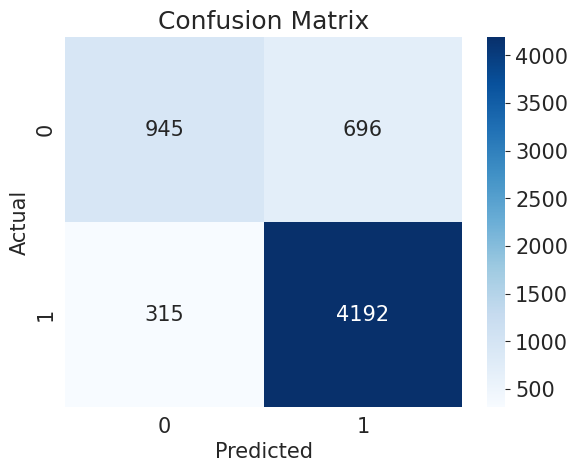

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=MNB.classes_, yticklabels=MNB.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The score listed in the output (83.55 %) is overall accuracy of the model which is the percentage of the correct predictions across all classes.

# ii. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
params = {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,6,7,8,9,10]}
grid_search = GridSearchCV(model_dt, params)
grid_search.fit(X_train, y_train)
grid_search.best_params_
print(f'Best Params: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Params: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}
Best Score: 0.7978796814697388


In [ ]:
# Fitting the model with best parameters
model_dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

accuracy_DT = accuracy_score(y_test, y_pred_dt)

print("Confusion Matrix for DT :")
print(confusion_matrix(y_test,y_pred_dt))

print("Accuracy Score: ",accuracy_DT)


print("Classification Report: ")
print(classification_report(y_test,y_pred_dt))

Confusion Matrix for MNB :
[[1028  613]
 [ 797 3710]]
Accuracy Score:  0.7706571242680547
Classification Report: 
              precision    recall  f1-score   support

           0       0.56      0.63      0.59      1641
           1       0.86      0.82      0.84      4507

    accuracy                           0.77      6148
   macro avg       0.71      0.72      0.72      6148
weighted avg       0.78      0.77      0.77      6148



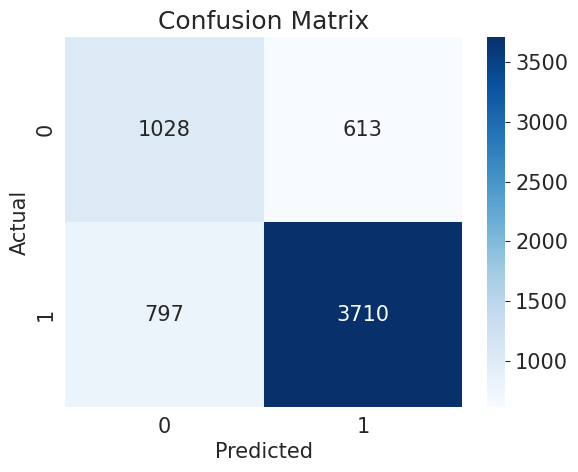

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = model_dt.classes_, yticklabels = model_dt.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The score listed in the output (77.06 %) is overall accuracy of the model which is the percentage of the correct predictions across all classes.

# iii. Random Forest

In [ ]:
# Grid search
model_rf = RandomForestClassifier()
params = {'n_estimators': [50, 100, 150, 200, 250, 300],'max_depth': [5, 7, 9, 11, 13,]}
grid_search = GridSearchCV(model_rf, params)
grid_search.fit(X_train, y_train)
grid_search.best_params_
print(f'Best Params: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Params: {'max_depth': 13, 'n_estimators': 50}
Best Score: 0.7401520509967316


In [ ]:
# Fitting the model with best parameters
model_rf = RandomForestClassifier(n_estimators=50,max_features='auto',max_depth=13)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest :")
print(confusion_matrix(y_test,y_pred_rf))

print("Accuracy Score: ",accuracy_rf)


print("Classification Report: ")
print(classification_report(y_test,y_pred_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Confusion Matrix for Random Forest :
[[  19 1622]
 [   0 4507]]
Accuracy Score:  0.736174365647365
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.01      0.02      1641
           1       0.74      1.00      0.85      4507

    accuracy                           0.74      6148
   macro avg       0.87      0.51      0.44      6148
weighted avg       0.81      0.74      0.63      6148



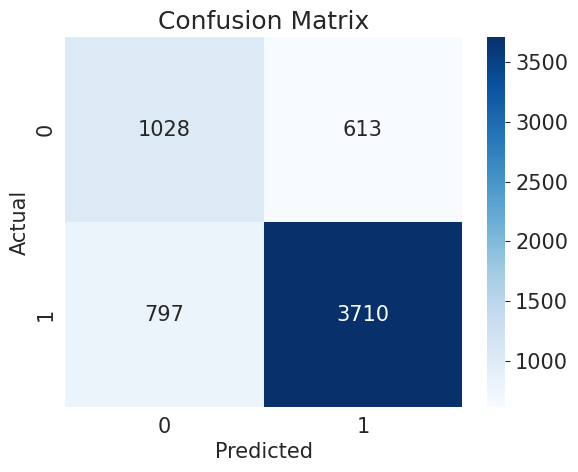

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = model_rf.classes_, yticklabels = model_rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The score listed in the output (73.61 %) is overall accuracy of the model which is the percentage of the correct predictions across all classes.

# iV. Support Vector Machines(SVM)

In [ ]:
# Grid search
from sklearn.svm import SVC
model_svc= SVC()
params = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
cv = KFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(model_svc, params)
grid_search.fit(X_train, y_train)
grid_search.best_params_
print(f'Best Params: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

KeyboardInterrupt: 

In [ ]:
# Fitting the model with best parameters
model_svc = SVC()#n_estimators=100,max_features='auto',max_depth=13)
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Confusion Matrix for SVM :")
print(confusion_matrix(y_test,y_pred_svc))

print("Accuracy Score: ",accuracy_svc)


print("Classification Report: ")
print(classification_report(y_test,y_pred_svc))

Confusion Matrix for SVM :
[[1143  498]
 [ 133 4374]]
Accuracy Score:  0.8973649967469096
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.70      0.78      1641
           1       0.90      0.97      0.93      4507

    accuracy                           0.90      6148
   macro avg       0.90      0.83      0.86      6148
weighted avg       0.90      0.90      0.89      6148



In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = model_svc.classes_, yticklabels = model_svc.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The score listed in the output (88.89%) is overall accuracy of the model which is the percentage of the correct predictions across all classes.

# 5.K Nearest Neighbour (KNN)

In [ ]:
# Grid search
model_knn = KNeighborsClassifier()
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}
cv = KFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(model_knn, params)
grid_search.fit(X_train, y_train)
grid_search.best_params_
print(f'Best Params: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

In [ ]:
# Fitting the model with best parameters
model_knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Confusion Matrix for KNN :")
print(confusion_matrix(y_test,y_pred_knn))

print("Accuracy Score: ",accuracy_knn)


print("Classification Report: ")
print(classification_report(y_test,y_pred_knn))

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model_knn.classes_, yticklabels=model_knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('Multinomial Naive Bayes  = ',accuracy_MNB*100,'%')
print(' Decision tree    = ',accuracy_DT*100,'%')
print('Random Forest Classifier = ',accuracy_rf*100,'%')
print('Support Vector MAchine   = ',accuracy_svc*100,'%')
print('K Neighbor     = ',accuracy_knn*100,'%')

In [ ]:
from sklearn.pipeline import Pipeline
X=data["Cleaned_Review"]
y=data["Target"]

In [ ]:
clf=Pipeline([("tfidf",TfidfVectorizer()),("classifier",SVC())])

In [ ]:
clf

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', SVC())])

In [ ]:
clf.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', SVC())])

In [ ]:
X_test.shape

(6148, 68890)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1627
           1       0.98      1.00      0.99      4521

    accuracy                           0.99      6148
   macro avg       0.99      0.98      0.98      6148
weighted avg       0.99      0.99      0.99      6148



In [ ]:
clf.predict(["This hotel is amazing"])

array([1])

In [ ]:
clf.predict(["This is horrible"])

array([0])

In [ ]:
import pickle
pickle.dump(clf,open("Hotel_Review_Analysis.pkl","wb"))

In [153]:
pickle.dump(clean_text("review"),open("cleaned_data.pkl","wb"))

In [ ]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00


In [ ]:
! streamlit run HotelReview.py & npx localtunnel --port 8501

[..................] / fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.108.177:8501

npx: installed 22 in 3.166s
your url is: https://rare-teeth-pick.loca.lt
[1]
